In [1]:
import Levenshtein
import pandas as pd

In [2]:
data_path = '/data/task4'

In [3]:
with open(f"{data_path}/dict.txt", encoding="utf8") as f:
    words = f.readlines()

In [4]:
words = [word.rstrip('\n') for word in words]

In [5]:
len(words)

62027

In [7]:
words[:10]

['абажур',
 'абажурчик',
 'абазин',
 'абазинец',
 'абазинцы',
 'абазинка',
 'абазия',
 'абандон',
 'аббат',
 'аббатиса']

In [8]:
words_frame = pd.DataFrame({'word': words})
words_frame.head(10)

,word
0,абажур
1,абажурчик
2,абазин
3,абазинец
4,абазинцы
5,абазинка
6,абазия
7,абандон
8,аббат
9,аббатиса


In [9]:
words_frame.nunique()

word    61988
dtype: int64

In [10]:
with open(f"{data_path}/queries.txt", encoding="utf8") as f:
    queries = f.readlines()

In [11]:
queries = [query.rstrip('\n') for query in queries]

In [12]:
len(queries)

100000

In [13]:
queries[:10]

['воспитаннясть',
 'неоплатоэивк',
 'махаьный',
 'втникж',
 'эйдетки',
 'лепидосьрне',
 'эътомолог',
 'патуинча',
 'утожишоки',
 'дружеественнось']

In [14]:
queries_frame = pd.DataFrame({'word': queries})
queries_frame.head(10)

,word
0,воспитаннясть
1,неоплатоэивк
2,махаьный
3,втникж
4,эйдетки
5,лепидосьрне
6,эътомолог
7,патуинча
8,утожишоки
9,дружеественнось


In [15]:
queries_frame.nunique()

word    98673
dtype: int64

In [17]:
def get_words_at_each_step(word1, word2):
    edit_ops = Levenshtein.editops(word1, word2)
    history = []
    if len(edit_ops) >= 3:
        return []
    for i in range(1, len(edit_ops) + 1):
        step = Levenshtein.apply_edit(edit_ops[:i], word1, word2)
        history.append(step)
    return history

In [18]:
%%time
result = []
for query in queries:
    if query in words:
        result.append({'distance': 0, 'source': query, 'target': query, 'steps': []})
        continue
    min_distance = float('inf')
    min_distance_word = None
    for word in words:
        distance = Levenshtein.distance(query, word)
        if distance < min_distance:
            min_distance = distance
            min_distance_word = word
            if distance == 1:
                break
    addition = {'distance': min_distance, 'source': query, 
                'target': min_distance_word, 
                'steps': get_words_at_each_step(query, min_distance_word)}
    result.append(addition)

CPU times: user 1h 22min 52s, sys: 713 ms, total: 1h 22min 53s
Wall time: 1h 22min 56s


In [20]:
result[:100]

[{'distance': 1,
  'source': 'воспитаннясть',
  'target': 'воспитанность',
  'steps': ['воспитанность']},
 {'distance': 2,
  'source': 'неоплатоэивк',
  'target': 'неоплатоник',
  'steps': ['неоплатонивк', 'неоплатоник']},
 {'distance': 1,
  'source': 'махаьный',
  'target': 'махальный',
  'steps': ['махальный']},
 {'distance': 2,
  'source': 'втникж',
  'target': 'ватник',
  'steps': ['ватникж', 'ватник']},
 {'distance': 2,
  'source': 'эйдетки',
  'target': 'эйдетик',
  'steps': ['эйдетики', 'эйдетик']},
 {'distance': 3,
  'source': 'лепидосьрне',
  'target': 'лепидосирен',
  'steps': []},
 {'distance': 1,
  'source': 'эътомолог',
  'target': 'энтомолог',
  'steps': ['энтомолог']},
 {'distance': 2,
  'source': 'патуинча',
  'target': 'патина',
  'steps': ['патинча', 'патина']},
 {'distance': 4, 'source': 'утожишоки', 'target': 'дожинки', 'steps': []},
 {'distance': 2,
  'source': 'дружеественнось',
  'target': 'дружественность',
  'steps': ['дружественнось', 'дружественность']},
 {'d

In [21]:
len(result)

100000

In [32]:
strings = []

In [33]:
for record in result:
    if record['distance'] >= 3:
        appendix = "3+"
    elif record['distance'] == 0:
        appendix = "0"
    else:
        steps_part = " ".join(record['steps'])
        appendix = f"{record['distance']} {steps_part}"
    strings.append(f"{record['source']} {appendix}")

In [34]:
len(strings)

100000

In [35]:
strings[:100]

['воспитаннясть 1 воспитанность',
 'неоплатоэивк 2 неоплатонивк неоплатоник',
 'махаьный 1 махальный',
 'втникж 2 ватникж ватник',
 'эйдетки 2 эйдетики эйдетик',
 'лепидосьрне 3+',
 'эътомолог 1 энтомолог',
 'патуинча 2 патинча патина',
 'утожишоки 3+',
 'дружеественнось 2 дружественнось дружественность',
 'ьньилот 2 ньилот нилот',
 'оитехник 2 зоитехник зоотехник',
 'абхазка 0',
 'рейлвьеф 2 релвьеф рельеф',
 'примышление 0',
 'долгоетрпение 2 долготетрпение долготерпение',
 'рненападение 1 ненападение',
 'юлилипутка 1 лилипутка',
 'иответчиа 2 ответчиа ответчик',
 'яфетуодлгиоя 3+',
 'портативность 0',
 'тбаор 2 баор багор',
 'судовдение 1 судоведение',
 'рчозанец 1 розанец',
 'пкаромщица 1 паромщица',
 'рдацыена 3+',
 'полсотлька 2 полстотлька полстолька',
 'ппетизаиця 3+',
 'вскрикиваниа 1 вскрикивание',
 'акугзпунктуа 3+',
 'кисхлощик 2 кислощик кисловщик',
 'пузанвик 1 пузанчик',
 'вневейсковик 1 вневойсковик',
 'радлуа 2 раджуа раджа',
 'кломчья 1 клочья',
 'сиволпаостьм 3+',
 '

In [36]:
output = open('first_answers.txt', 'w')
for r in strings:
    output.write(r + '\n')

output.close()

**Result:**

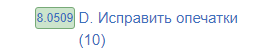